<a href="https://colab.research.google.com/github/RecursiveOuroboros/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/LS_DS_232_IoT_Telementary_Test_data_Jason_Meil_DS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Appropriate Libraries
import random
import seaborn as sns
import numpy as np
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Importing the DataSet
data = pd.read_csv('http://aws-proserve-data-science.s3.amazonaws.com/device_failure.csv', encoding='latin1')

In [70]:
data.head(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [71]:
#exporing data types and looking for null values
data.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object

In [72]:
data.isnull()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
data['failure'].value_counts()


0    124388
1       106
Name: failure, dtype: int64

In [0]:
# Dropping uncessecary data
data_2 = data.drop(columns=['device', 'date'])

In [75]:
data_2.columns

Index(['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

In [76]:
data_2.groupby('failure').count()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,,,,,,,,,
0,124388,124388,124388,124388,124388,124388,124388,124388,124388
1,106,106,106,106,106,106,106,106,106


In [77]:
data_2.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001983,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001983,1.000000,-0.004250,0.003701,0.001836,-0.003376,-0.001522,0.000151,0.000151,0.001121
attribute2,0.052902,-0.004250,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003701,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001836,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003376,-0.013999,-0.006696,-0.009773,1.000000,-0.017049,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001522,-0.026350,0.009027,0.024870,-0.017049,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001121,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [0]:
sns.set()

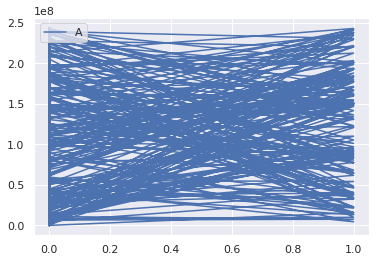

In [79]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute1']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

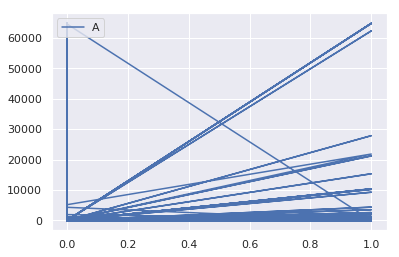

In [80]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute2']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

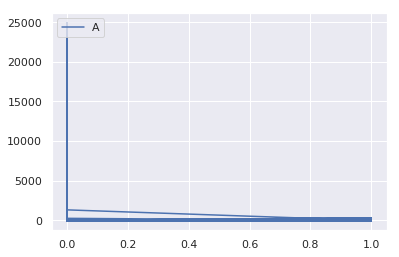

In [81]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute3']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

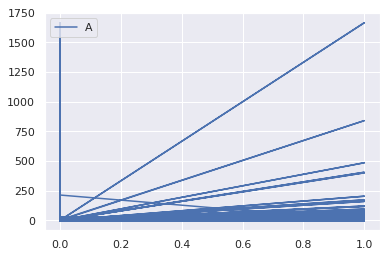

In [82]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute4']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

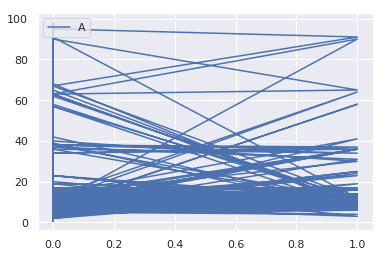

In [83]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute5']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

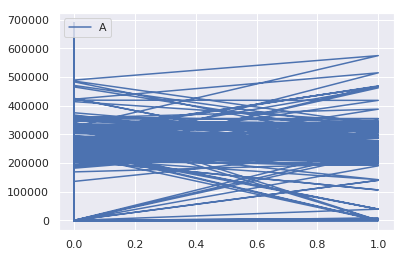

In [84]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute6']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

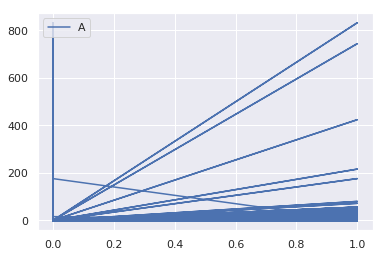

In [85]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute7']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

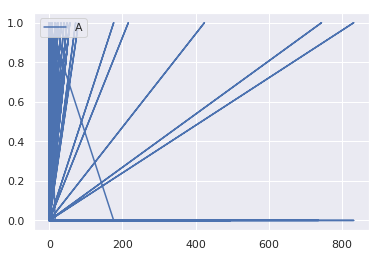

In [86]:
# same plotting code as above!
x = data_2['attribute8']
y = data_2['failure']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

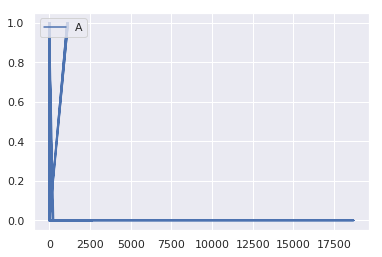

In [87]:
# same plotting code as above!
x = data_2['attribute9']
y = data_2['failure']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [115]:
sns.pairplot(data_2, y_vars=['failure'], x_vars=X)


KeyboardInterrupt: ignored

ValueError: ignored

<Figure size 2.24089e+07x180 with 4814 Axes>

In [0]:
# Logit Variable Assignment
y = data_2['failure']
X = data_2[['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9']]

In [89]:
#logisticRegr = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=.85, test_size=.15)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((105819, 9), (18675, 9), (105819,), (18675,))

In [109]:
xdf=pd.DataFrame(X_train)
xdf.head()

,0,1,2,3,4,5,6
0,0,62,0,95,251822,0,0
1,0,0,0,70,240729,0,0
2,0,1,0,7,324556,0,0
3,0,0,0,6,220867,0,0
4,0,1,0,3,212121,0,0


In [110]:
xtdf=pd.DataFrame(X_test)
xtdf.head()

,0,1,2,3,4,5,6
0,0,0,0,11,466917,0,0
1,0,0,0,11,218810,0,0
2,0,0,0,8,224690,0,0
3,136,0,0,12,268714,0,0
4,0,0,0,13,243799,0,0


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [92]:
# Run Confusion matrix shows 37315 correct and 34 incorrect
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[37315     0]
 [   34     0]]


In [93]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.009749
         Iterations 13


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1100: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                                           Results: Logit
Model:                          Logit                        Pseudo R-squared:             -0.419   
Dependent Variable:             failure                      AIC:                          2443.4238
Date:                           2019-05-14 21:32             BIC:                          2521.2799
No. Observations:               124494                       Log-Likelihood:               -1213.7  
Df Model:                       7                            LL-Null:                      -855.22  
Df Residuals:                   124486                       LLR p-value:                  1.0000   
Converged:                      1.0000                       Scale:                        1.0000   
No. Iterations:                 13.0000                                                             
----------------------------------------------------------------------------------------------------
            Coef.        Std.Err.

In [94]:
cols= [ 'attribute2', 'attribute4', 'attribute5', 'attribute7', 'attribute8', 'attribute9'] 
X=data_2 [cols]
y=data_2 ['failure']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.013654
         Iterations: 35


LinAlgError: ignored

In [95]:
# Comptute Precision, recall, and F-Measure Support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37315
           1       0.00      0.00      0.00        34

   micro avg       1.00      1.00      1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


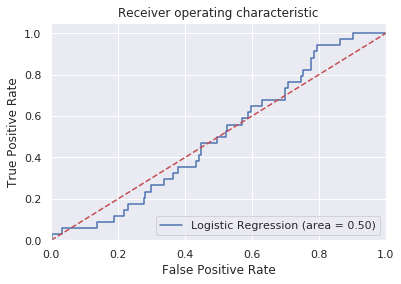

In [96]:
#Plot ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer

clf = RandomForestClassifier()  
clf.fit(X, y) 
rfc = RandomForestClassifier(n_estimators=1000,
                             min_samples_split=6,
                             criterion='gini',
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rfc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [98]:
# Running a Decision Tree Algorithm
# Confirming that we still have failure target and 
# 9 attributes across axis 1

print ("Dataset Length:: ", len(data_2))
print ("Dataset Shape:: ", data_2.shape)

Dataset Length::  124494
Dataset Shape::  (124494, 10)


In [0]:
data_2.head()
#Slicing to split data appropriatley for TTS
Y = data_2.values[:,1]
X = data_2.values[:, 2:9]

In [0]:
# 30% of whole data set and 70% Training Set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [0]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [102]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [106]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')